# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


The learning rate in Stochastic Gradient Descent (SGD) determines the size of parameter updates and strongly affects convergence.
If the learning rate is too large, the algorithm may overshoot the minimum, causing oscillations or divergence.
If it is too small, convergence is stable but very slow.
A well-chosen learning rate enables fast and stable convergence.

To handle this trade-off, several strategies are used:

Fixed learning rate – simple but requires careful tuning.

Learning rate decay (step, exponential, or polynomial) – reduces the learning rate over time to improve convergence near the optimum.


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Real estate.csv')

df_clean = df.drop(['No', 'X1 transaction date'], axis=1)

X = df_clean.iloc[:, :-1].values
y = df_clean.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


class BatchGDLinearRegression:
    def __init__(self, learning_rate=0.05, epochs=5000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            mse = np.mean((y_predicted - y)**2)
            self.loss_history.append(mse)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

class SGDLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(n_samples):
                y_pred_single = np.dot(X_shuffled[i], self.weights) + self.bias

                error = y_pred_single - y_shuffled[i]
                dw = error * X_shuffled[i]
                db = error

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

            y_epoch_pred = np.dot(X, self.weights) + self.bias
            self.loss_history.append(np.mean((y_epoch_pred - y)**2))

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
gd_model = BatchGDLinearRegression(learning_rate=0.05, epochs=2000)
sgd_model = SGDLinearRegression(learning_rate=0.01, epochs=100)
gd_model.fit(X_train_scaled, y_train)
sgd_model.fit(X_train_scaled, y_train)

y_pred_gd = gd_model.predict(X_test_scaled)
y_pred_sgd = sgd_model.predict(X_test_scaled)

mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print(f"{'Metric':<20} | {'Batch GD':<15} | {'SGD':<15}")
print("-" * 56)
print(f"{'MSE':<20} | {mse_gd:<15.4f} | {mse_sgd:<15.4f}")
print(f"{'R2 Score':<20} | {r2_gd:<15.4f} | {r2_sgd:<15.4f}")

print("\n--- Part g: Experimenting with SGD Hyperparameters ---")

sgd_exp = SGDLinearRegression(learning_rate=0.1, epochs=20)
sgd_exp.fit(X_train_scaled, y_train)
y_pred_exp = sgd_exp.predict(X_test_scaled)
print(f"High LR (0.1), Low Epochs (20) -> MSE: {mean_squared_error(y_test, y_pred_exp):.4f}")


sgd_exp_2 = SGDLinearRegression(learning_rate=0.0001, epochs=500)
sgd_exp_2.fit(X_train_scaled, y_train)
y_pred_exp_2 = sgd_exp_2.predict(X_test_scaled)
print(f"Low LR (0.0001), High Epochs (500) -> MSE: {mean_squared_error(y_test, y_pred_exp_2):.4f}")

Metric               | Batch GD        | SGD            
--------------------------------------------------------
MSE                  | 65.0614         | 69.7970        
R2 Score             | 0.5898          | 0.5600         

--- Part g: Experimenting with SGD Hyperparameters ---
High LR (0.1), Low Epochs (20) -> MSE: 67.3839
Low LR (0.0001), High Epochs (500) -> MSE: 71.7677


The SGD path is erratic (noisy) because the gradient is calculated based on a single training example at a time, rather than the average of the entire dataset. One outlier or "hard" data point can pull the weights in a completely different direction than the general trend.
Why it is preferred for large datasets:

Memory Efficiency, speed and helps model to jump out of local minima

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



### **3.1 Theoretical and Numerical Questions**

**a) Supervised or Unsupervised?**
**Decision Trees** are a **Supervised Learning** algorithm. They function by learning a mapping from input features to target classes using labeled training data.

**b) What is Entropy?**
**Entropy** quantifies the impurity or disorder within a dataset.
* **High Entropy (approx 1):** The node is impure (e.g., an equal mix of positive and negative classes).
* **Low Entropy (0):** The node is pure (contains instances of only one class).

**Formula:**
$$H(S) = - \sum p_i \log_2(p_i)$$

**c) What does reduction in entropy signify?**
**Reduction in entropy** (Information Gain) represents the increase in purity achieved by splitting the data. The algorithm selects the split that maximizes this reduction, creating child nodes that are more homogeneous than the parent node.

---

#### **d) Numerical Calculation**

**1. Entropy of Root Node**
* Class (+): 5 instances
* Class (-): 5 instances
* Total: 10

$$H(\text{Root}) = -(0.5 \log_2 0.5 + 0.5 \log_2 0.5) = -(-0.5 - 0.5) = \mathbf{1.00}$$

**2. Analysis of Splits**

* **Split 1: ($x \le -2$)**
    * **Yes:** 1 point (-) $\rightarrow$ Pure ($H=0$)
    * **No:** 9 points (5+, 4-) $\rightarrow$ Mixed
    * $H(\text{No}) \approx 0.99$
    * **Weighted Entropy:** $\frac{1}{10}(0) + \frac{9}{10}(0.99) = \mathbf{0.891}$
    * **Information Gain:** $1.00 - 0.891 = \mathbf{0.11}$

* **Split 2: ($x \le 2$)**
    * Symmetric to Split 1.
    * **Information Gain:** $\mathbf{0.11}$

* **Split 3: ($y \le 2$)**
    * **Yes:** 5 points (4+, 1-)
        * $P(+) = 0.8, P(-) = 0.2$
        * $H(\text{Yes}) = -(0.8 \log_2 0.8 + 0.2 \log_2 0.2) \approx \mathbf{0.72}$
    * **No:** 5 points (1+, 4-)
        * Symmetric to "Yes".
        * $H(\text{No}) \approx \mathbf{0.72}$
    * **Weighted Entropy:** $\frac{5}{10}(0.72) + \frac{5}{10}(0.72) = \mathbf{0.72}$
    * **Information Gain:** $1.00 - 0.72 = \mathbf{0.28}$

**Conclusion:**
The split **($y \le 2$)** yields the highest Information Gain (**0.28**) and should be chosen.

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


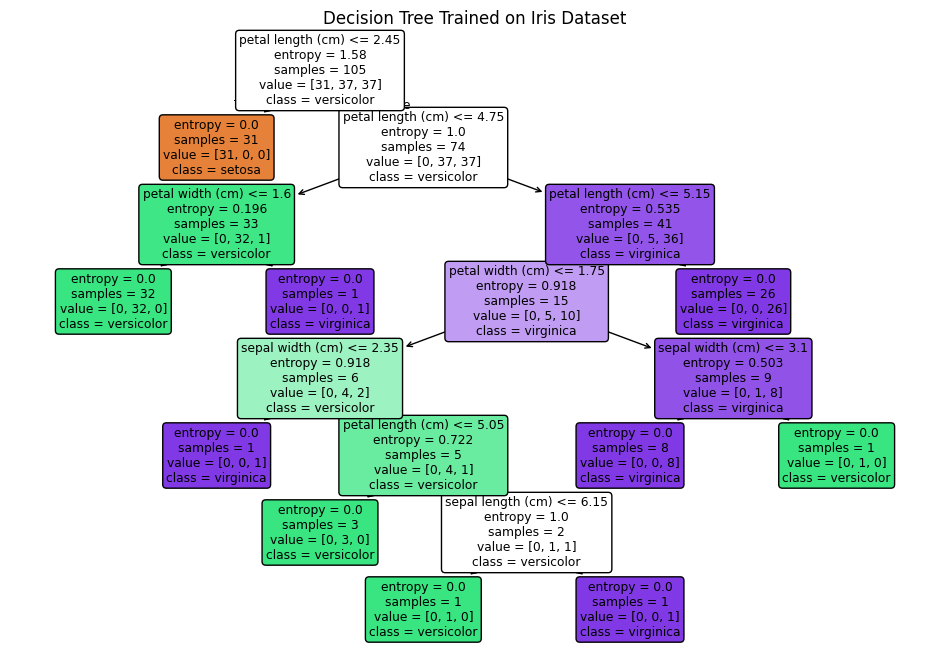

Model Accuracy on Test Set: 0.98


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()

accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")

# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

**a) Supervised or Unsupervised?**
SVM is a **Supervised Learning** algorithm. It requires a labeled dataset to determine the decision boundary (hyperplane) that best separates the classes.

**b) Margin**
The **margin** is the perpendicular distance between the decision boundary (hyperplane) and the closest data points (support vectors) from either class.
* **Why maximize it?** A wider margin reduces the generalization error, making the model more robust to noise and better at classifying unseen data.

**c) Support Vectors**
**Support Vectors** are the specific data points that lie closest to the decision boundary.
* **Importance:** They completely define the position and orientation of the hyperplane. Removing or moving non-support vectors has no effect on the model.

**d) Kernel Functions**
A **kernel function** transforms the input data into a higher-dimensional space where it becomes linearly separable. This allows SVM to solve non-linear problems efficiently (the "Kernel Trick").
* **Common Kernels:**
    1.  Radial Basis Function (RBF)
    2.  Polynomial Kernel

---

### **4.2**

**a) Optimal Separating Hyperplane**
In a linearly separable dataset, SVM selects the hyperplane that **maximizes the margin** (the distance between the hyperplane and the nearest points of each class).

**b) Non-linearly Separable Data**
When data cannot be separated by a straight line, SVM handles it by:
1.  **Soft Margin:** Allowing some misclassifications using slack variables.
2.  **Kernel Trick:** Mapping the data to a higher dimension where a linear separator exists.

**c) Role of Regularization Parameter `C`**
The parameter **`C`** controls the trade-off between maximizing the margin and minimizing classification errors on the training data.
* **Large `C`:** Strict penalty for errors. Result: **Narrow margin**, complex model, high risk of **overfitting**.
* **Small `C`:** Loose penalty for errors. Result: **Wider margin**, simpler model, potential for **underfitting**.